<a href="https://colab.research.google.com/github/anuragsh31/imageClassificationUsingCNN/blob/main/catVSDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:33<00:00, 39.7MB/s]
100% 1.06G/1.06G [00:33<00:00, 34.0MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
#Generators #it devide large amount of data into batches
train_ds=keras.utils.image_dataset_from_directory(
    directory= '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [ ]:
validation_ds=keras.utils.image_dataset_from_directory(
    directory= '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# CNN Model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(train_ds, validation_data=validation_ds, epochs=5)

Epoch 1/5
625/625 [==============================] - 86s 121ms/step - loss: 1.2489 - accuracy: 0.5634 - val_loss: 0.6429 - val_accuracy: 0.6064
Epoch 2/5
625/625 [==============================] - 75s 119ms/step - loss: 0.5841 - accuracy: 0.6925 - val_loss: 0.6004 - val_accuracy: 0.6760
Epoch 3/5
625/625 [==============================] - 78s 124ms/step - loss: 0.4890 - accuracy: 0.7653 - val_loss: 0.6116 - val_accuracy: 0.6648
Epoch 4/5
625/625 [==============================] - 75s 119ms/step - loss: 0.4296 - accuracy: 0.8026 - val_loss: 0.4561 - val_accuracy: 0.7832
Epoch 5/5
625/625 [==============================] - 77s 123ms/step - loss: 0.3672 - accuracy: 0.8378 - val_loss: 0.4680 - val_accuracy: 0.7892


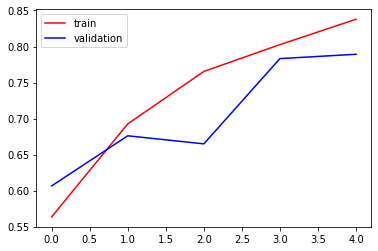

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')

plt.legend()
plt.show()

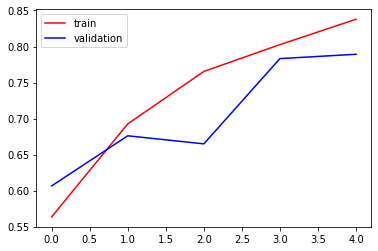

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

traing accuracy is high but at test, it is low. and
difference between training and testing accuracy is very high.
it means overfitting happen. so we have to reduce overfitting.

 ways to reduce overfitting

. Add more data
. Data Augmentation
. L1/L2 Regularizer
. Dropout
. Batch Norm
. Reduce complexity

In [ ]:
# For Prediction
import cv2

In [ ]:
test=cv2.imread('/content/cat.jpg')

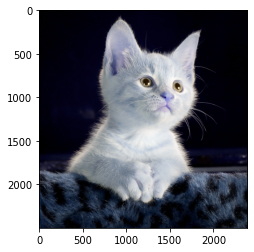

In [ ]:
plt.imshow(test)

In [ ]:
test.shape

(2500, 2392, 3)

In [ ]:
test_img = cv2.resize(test,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)   # 0 represent cat 1 represent Dog

1/1 [==============================] - 0s 16ms/step


array([[0.]], dtype=float32)